In [1]:
import os
import time
import h5py
import numpy as np
import pyfftw as ft
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
start = time.time()

wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
w2 = ft.zeros_aligned((N,N,N), dtype='float32')
S2 = ft.zeros_aligned((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

119.103703022


In [4]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

56.9027049541


In [5]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lS2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

63.3389670849


In [6]:
del lw2,lS2

In [7]:
start = time.time()

w2 = 0.5*w2

avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

end = time.time()
print(end-start)

(249.21841, 249.2186, 7.3471887e-07)
44.8348097801


In [8]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

69.4583120346


In [9]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [10]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*isotropic1024coarse['dx']
    
for j in range(N):
    Y[:,j,:] = j*isotropic1024coarse['dy']
    
for k in range(N):
    Z[:,:,k] = k*isotropic1024coarse['dz']

end = time.time()
print(end-start)

409.980587006


In [11]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

In [12]:
start = time.time()

dtl = [1,0.7,0.5,0.2,0.1,0.05,0.025,0.01,0.005]

lcorr = []
llogr = []

t=5
for dt in dtl:
    start = time.time()
    
    Index = (w2 > t*avg)&(w2 < t*(1+dt)*avg)&(S2 > t*avg)&(S2 < t*(1+dt)*avg)
    
    chi[:,:,:] = 0
    chi[Index] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 452.293678045
time : 399.862106085
time : 395.376088858
time : 372.838402987
time : 375.274785042
time : 367.418692112
time : 437.024877787
time : 463.26671195
time : 404.841650009


Linear fit [alpha A] = [-1.17900203 -1.5607553 ]
Linear fit [alpha A] = [-1.13978442 -2.08562241]
Linear fit [alpha A] = [-1.11064047 -2.6187278 ]
Linear fit [alpha A] = [-1.06391219 -4.17916317]
Linear fit [alpha A] = [-1.02779085 -5.55088222]
Linear fit [alpha A] = [-1.00192627 -7.00844713]
Linear fit [alpha A] = [-1.00215053 -8.30017312]
Linear fit [alpha A] = [ nan  nan]
Linear fit [alpha A] = [ nan  nan]


/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log


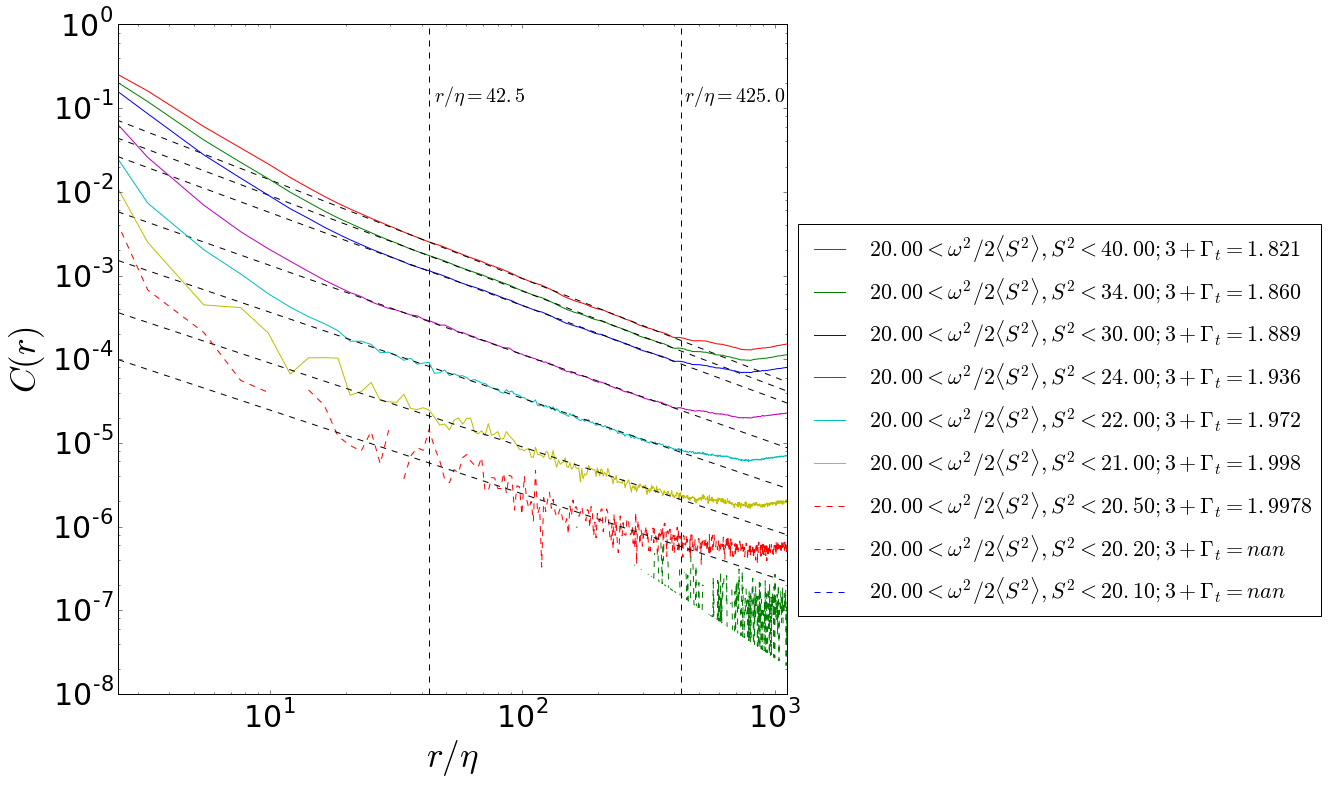

In [25]:
eta = 0.00280

c  = ['r','g','b','m','c','y','r','g','b']

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-8),10**(0)])
#plt.grid()
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = t
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < \omega^2/2\langle S^2\rangle, S^2 < {two:.2f}; 3+\Gamma_t = {three:.3f}$'.format(one=th,two=th*(1+dtl[i]),three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
for i in range(6,9,1):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = t
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'${one:.2f} < \omega^2/2\langle S^2\rangle, S^2 < {two:.2f}; 3+\Gamma_t = {three:.4f}$'.format(one=th,two=th*(1+dtl[i]),three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.12, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.12, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22}, bbox_to_anchor=(1, 0.1))
plt.savefig('twopoint-joint-thickness-sensitivity-5.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [21]:
start = time.time()

dtl = [1,0.7,0.5,0.2,0.1,0.05,0.025,0.01,0.005]

lcorr = []
llogr = []

t=20
for dt in dtl:
    start = time.time()
    
    Index = (w2 > t*avg)&(w2 < t*(1+dt)*avg)&(S2 > t*avg)&(S2 < t*(1+dt)*avg)
    
    chi[:,:,:] = 0
    chi[Index] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 377.405609131
time : 344.53055191
time : 378.273736954
time : 362.308770895
time : 349.256958961
time : 350.890285969
time : 364.160482883
time : 366.101128101
time : 360.585081816


Linear fit [alpha A] = [-1.17900203 -1.5607553 ]
Linear fit [alpha A] = [-1.13978442 -2.08562241]
Linear fit [alpha A] = [-1.11064047 -2.6187278 ]
Linear fit [alpha A] = [-1.06391219 -4.17916317]
Linear fit [alpha A] = [-1.02779085 -5.55088222]
Linear fit [alpha A] = [-1.00192627 -7.00844713]
Linear fit [alpha A] = [-1.00215053 -8.30017312]
Linear fit [alpha A] = [ nan  nan]
Linear fit [alpha A] = [ nan  nan]


/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log


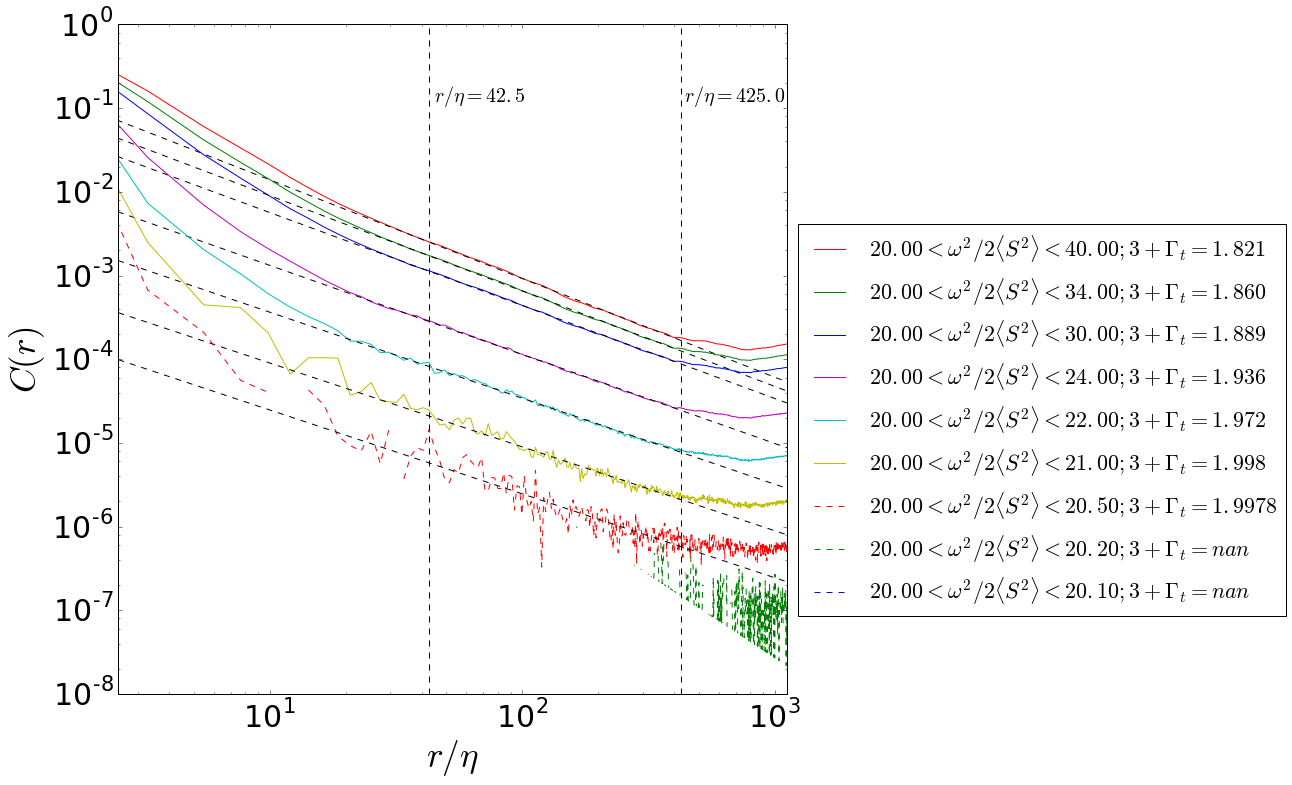

In [22]:
eta = 0.00280

c  = ['r','g','b','m','c','y','r','g','b']

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-8),10**(0)])
#plt.grid()
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = t
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.3f}$'.format(one=th,two=th*(1+dtl[i]),three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
for i in range(6,9,1):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = t
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.4f}$'.format(one=th,two=th*(1+dtl[i]),three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.12, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.12, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22}, bbox_to_anchor=(1, 0.1))
plt.savefig('twopoint-joint-thickness-sensitivity-20.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [26]:
start = time.time()

dtl = [1,0.7,0.5,0.2,0.1,0.05,0.025,0.01,0.005]

lcorr = []
llogr = []

t=35
for dt in dtl:
    start = time.time()
    
    Index = (w2 > t*avg)&(w2 < t*(1+dt)*avg)&(S2 > t*avg)&(S2 < t*(1+dt)*avg)
    
    chi[:,:,:] = 0
    chi[Index] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    print("time : "+str(end-start))

time : 402.875432968
time : 341.602758884
time : 372.563004971
time : 372.811788082
time : 367.061513901
time : 383.255684853
time : 385.027190924
time : 398.81231308
time : 365.729454994


Linear fit [alpha A] = [-1.65033703 -0.7861715 ]
Linear fit [alpha A] = [-1.6071353  -1.29315671]
Linear fit [alpha A] = [-1.5771366  -1.78306238]
Linear fit [alpha A] = [-1.51386746 -3.380728  ]
Linear fit [alpha A] = [-1.57237073 -4.22653624]
Linear fit [alpha A] = [ nan  nan]
Linear fit [alpha A] = [ nan  nan]
Linear fit [alpha A] = [ nan  nan]
Linear fit [alpha A] = [ nan  nan]


/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log


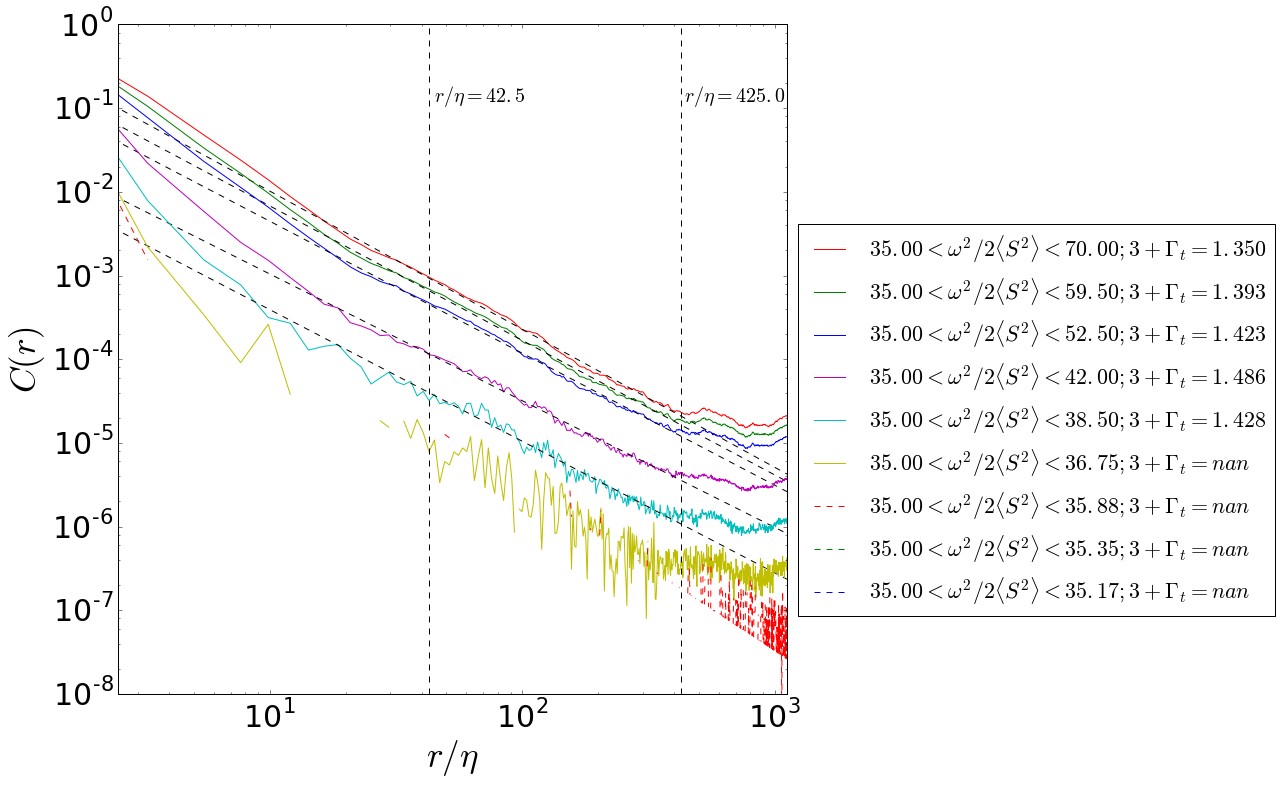

In [27]:
eta = 0.00280

c  = ['r','g','b','m','c','y','r','g','b']

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,12))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C(r)$', fontsize=35)
plt.xlim([7*10**(-3)/eta,np.pi/eta])
plt.ylim([10**(-8),10**(0)])
#plt.grid()
    
for i in range(6):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = t
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i],label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.3f}$'.format(one=th,two=th*(1+dtl[i]),three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
for i in range(6,9,1):
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
    fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
    print("Linear fit [alpha A] = "+str(fit))
    # label=r'${0:.3f} \langle S^2\rangle < \frac{1}{2}\omega^2  < {0:.3f}\langle S^2\rangle $ : $3+\Gamma_t = {0:.3f}$'.format(1.00*tl[i],1.05*tl[i],3+fit[0])
    th = t
    plt.loglog(bins/eta,(corrF)/(corrF[0]),c[i]+'--',label=r'${one:.2f} < \omega^2/2\langle S^2\rangle < {two:.2f}; 3+\Gamma_t = {three:.4f}$'.format(one=th,two=th*(1+dtl[i]),three=3+fit[0]))
    #corrF1 = hist[i][idx]
    plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.12, r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 0.12, r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22}, bbox_to_anchor=(1, 0.1))
plt.savefig('twopoint-joint-thickness-sensitivity-35.pdf', format='pdf', bbox_inches='tight', transparent=True)